# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
dataset_url = "https://raw.githubusercontent.com/aashish22bansal/Datasets/main/YouTube%20Adview%20Prediction/train.csv"

In [3]:
data = pd.read_csv(dataset_url)

In [4]:
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


# Exploratory Data Analysis

In [5]:
data.shape

(14999, 9)

In [6]:
data.columns

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [7]:
data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [9]:
data.isna().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40b931af90>]],
      dtype=object)

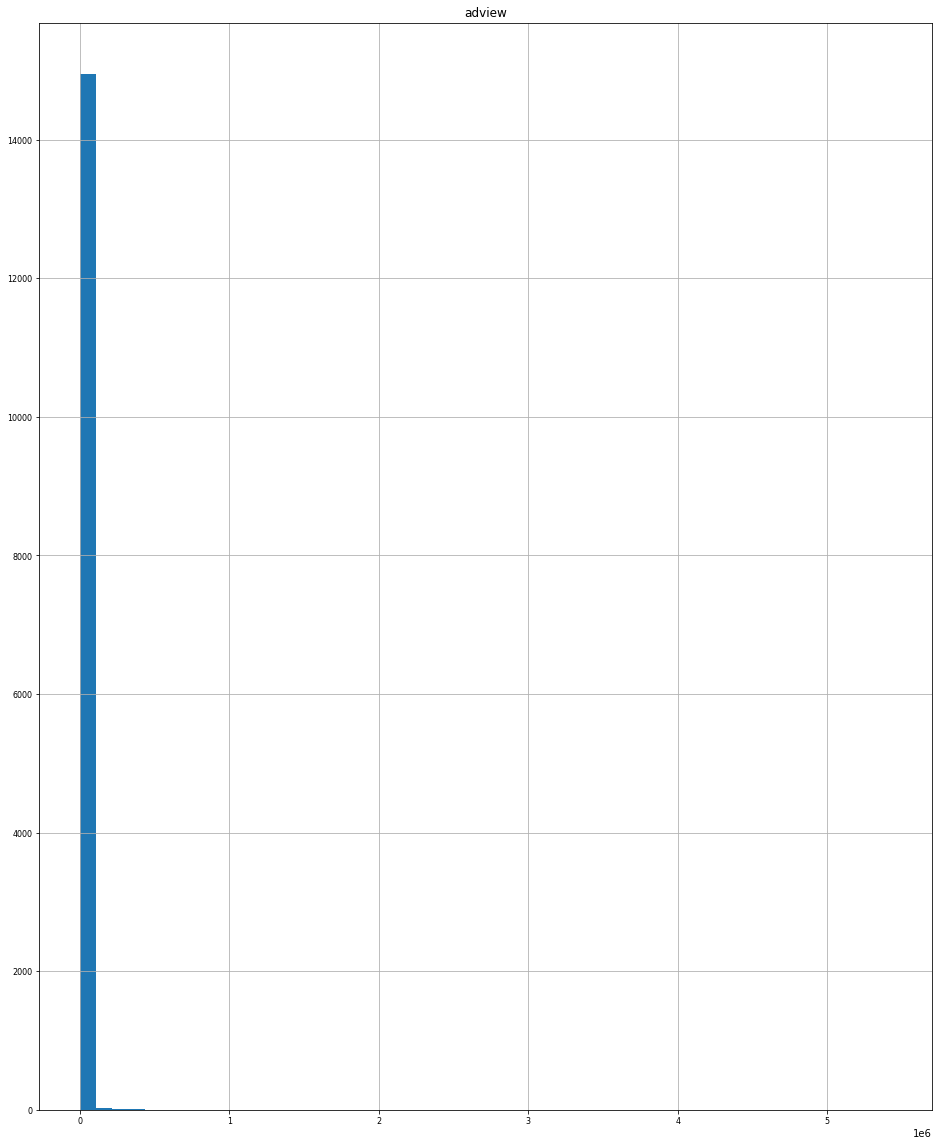

In [10]:
data.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

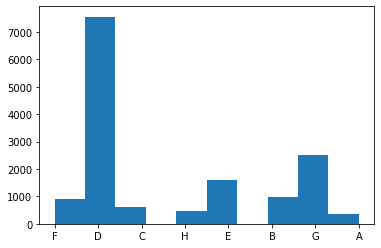

In [11]:
plt.hist(data["category"])
plt.show()

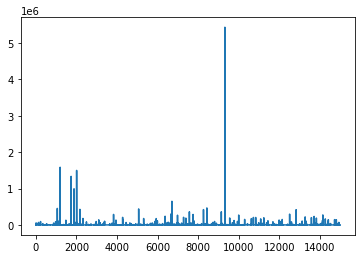

In [12]:
plt.plot(data["adview"])
plt.show()

# Data Preprocessing
Assigning each category a number for Category feature

In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6}

In [15]:
# # df = pd.DataFrame(columns=('A', 'B'))
# for i in range(data.shape[0]):
#    data["category"].loc[i] = float(7)

In [16]:
data["category"] = data["category"].map(category)

In [17]:
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6.0
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4.0
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3.0
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,NaN
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4.0
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1.0
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4.0
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2.0
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,NaN


Removing the character 'F' present in the data

In [18]:
data = data[data.views!='F']
data = data[data.likes!='F']
data = data[data.dislikes!='F']
data = data[data.comment!='F']

In [19]:
data["views"] = pd.to_numeric(data["views"])
data["comment"] = pd.to_numeric(data["comment"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])
data["adview"] = pd.to_numeric(data["adview"])

In [20]:
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6.0
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4.0
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3.0
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,NaN
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4.0
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1.0
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4.0
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2.0
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,NaN


In [21]:
column_vidID = data['vidid']
column_vidID

0        VID_18655
1        VID_14135
2         VID_2187
3        VID_23096
4        VID_10175
           ...    
14994       VID_31
14995     VID_5861
14996      VID_805
14997    VID_19843
14998     VID_8534
Name: vidid, Length: 14637, dtype: object

# Data Transformation
Encoding Features like Category, Duration, VidID

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
data['duration'] = LabelEncoder().fit_transform(data['duration'])
data['vidid'] = LabelEncoder().fit_transform(data['duration'])
data['published'] = LabelEncoder().fit_transform(data['published'])

In [24]:
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,2925,40,1031602,8523,363,1095,2168,2925,6.0
1,3040,2,1707,56,2,6,2185,3040,4.0
2,1863,1,2023,25,0,2,2094,1863,3.0
3,2546,6,620860,777,161,153,2119,2546,NaN
4,1963,1,666,1,0,0,2091,1963,4.0
...,...,...,...,...,...,...,...,...,...
14994,2833,2,525949,1137,83,86,1683,2833,1.0
14995,2257,1,665673,3849,156,569,1838,2257,4.0
14996,2210,4,3479,16,1,1,1053,2210,2.0
14997,1364,1,963,0,0,0,222,1364,NaN


Converting the Time_in_sec for duration:

In [25]:
import datetime
import time

In [26]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i=="M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m==''):
        m = '00'
    if(s==''):
        s='00'
    bp = h + ':' + m + ':' + s
    return bp

In [27]:
train = pd.read_csv(dataset_url)
train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [28]:
mp = pd.read_csv(dataset_url)["duration"]
mp

0        PT7M37S
1        PT9M30S
2        PT2M16S
3        PT4M22S
4          PT31S
          ...   
14994    PT6M10S
14995    PT3M56S
14996    PT3M13S
14997      PT26S
14998     PT1M1S
Name: duration, Length: 14999, dtype: object

In [29]:
time = mp.apply(checki)

In [30]:
time

0         00:7:37
1         00:9:30
2         00:2:16
3         00:4:22
4        00:00:31
           ...   
14994     00:6:10
14995     00:3:56
14996     00:3:13
14997    00:00:26
14998      00:1:1
Name: duration, Length: 14999, dtype: object

In [31]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h)*3600 + int(m)*60 + int(s)

In [32]:
time1 = time.apply(func_sec)
time1

0        457
1        570
2        136
3        262
4         31
        ... 
14994    370
14995    236
14996    193
14997     26
14998     61
Name: duration, Length: 14999, dtype: int64

# Visualization

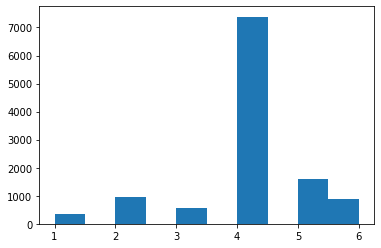

In [33]:
plt.hist(data["category"])
plt.show()

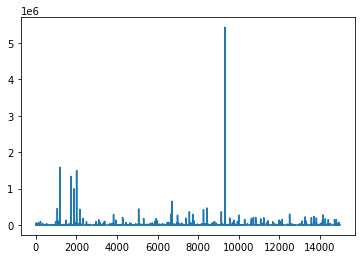

In [34]:
plt.plot(data["adview"])
plt.show()

Remove videos with adview greater than 2000000 as outlier.

In [35]:
data = data[data["adview"]<2000000]

In [36]:
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,2925,40,1031602,8523,363,1095,2168,2925,6.0
1,3040,2,1707,56,2,6,2185,3040,4.0
2,1863,1,2023,25,0,2,2094,1863,3.0
3,2546,6,620860,777,161,153,2119,2546,NaN
4,1963,1,666,1,0,0,2091,1963,4.0
...,...,...,...,...,...,...,...,...,...
14994,2833,2,525949,1137,83,86,1683,2833,1.0
14995,2257,1,665673,3849,156,569,1838,2257,4.0
14996,2210,4,3479,16,1,1,1053,2210,2.0
14997,1364,1,963,0,0,0,222,1364,NaN


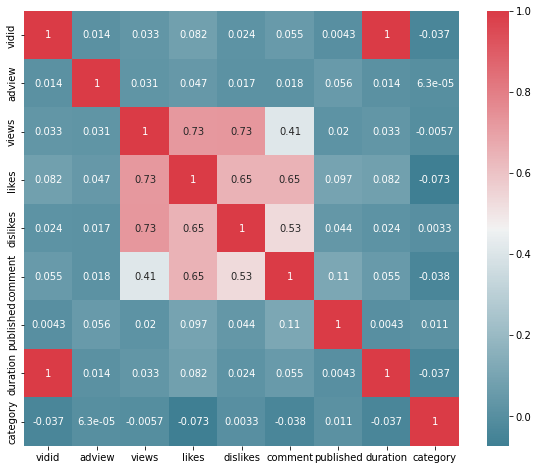

In [37]:
f, ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

# Checking NaN Values

In [38]:
np.isnan(data).sum()

vidid           0
adview          0
views           0
likes           0
dislikes        0
comment         0
published       0
duration        0
category     2893
dtype: int64

# Droping NaN Rows

In [39]:
data_list = data.values.tolist()

In [40]:
data_list

[[2925.0, 40.0, 1031602.0, 8523.0, 363.0, 1095.0, 2168.0, 2925.0, 6.0],
 [3040.0, 2.0, 1707.0, 56.0, 2.0, 6.0, 2185.0, 3040.0, 4.0],
 [1863.0, 1.0, 2023.0, 25.0, 0.0, 2.0, 2094.0, 1863.0, 3.0],
 [2546.0, 6.0, 620860.0, 777.0, 161.0, 153.0, 2119.0, 2546.0, nan],
 [1963.0, 1.0, 666.0, 1.0, 0.0, 0.0, 2091.0, 1963.0, 4.0],
 [373.0, 4.0, 78.0, 0.0, 0.0, 0.0, 2040.0, 373.0, 4.0],
 [2218.0, 40621.0, 43118.0, 15.0, 1.0, 0.0, 1778.0, 2218.0, 4.0],
 [2750.0, 1.0, 14205.0, 55.0, 16.0, 1.0, 2124.0, 2750.0, 5.0],
 [1385.0, 1.0, 526015.0, 3064.0, 211.0, 2582.0, 1855.0, 1385.0, 6.0],
 [88.0, 1.0, 406992.0, 3831.0, 310.0, 7839.0, 2187.0, 88.0, 2.0],
 [156.0, 19.0, 607447.0, 377.0, 144.0, 65.0, 2131.0, 156.0, 4.0],
 [2248.0, 9.0, 429137.0, 2181.0, 76.0, 172.0, 1905.0, 2248.0, 2.0],
 [2537.0, 224.0, 1895.0, 59.0, 5.0, 0.0, 2137.0, 2537.0, 2.0],
 [1566.0, 1.0, 59843.0, 68.0, 16.0, 10.0, 1948.0, 1566.0, 4.0],
 [1901.0, 2.0, 211642.0, 1378.0, 65.0, 103.0, 1638.0, 1901.0, 6.0],
 [2105.0, 1.0, 3700.0, 29.0, 

In [41]:
import sys

In [42]:
sys.getsizeof(data_list[3][8])

24

In [43]:
temp = []
count = 0
for i in data_list:
    x = np.isnan(i[8])
    if(x):
        print(x)
    else:
        temp.append(i)
    count = count + 1

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [44]:
temp

[[2925.0, 40.0, 1031602.0, 8523.0, 363.0, 1095.0, 2168.0, 2925.0, 6.0],
 [3040.0, 2.0, 1707.0, 56.0, 2.0, 6.0, 2185.0, 3040.0, 4.0],
 [1863.0, 1.0, 2023.0, 25.0, 0.0, 2.0, 2094.0, 1863.0, 3.0],
 [1963.0, 1.0, 666.0, 1.0, 0.0, 0.0, 2091.0, 1963.0, 4.0],
 [373.0, 4.0, 78.0, 0.0, 0.0, 0.0, 2040.0, 373.0, 4.0],
 [2218.0, 40621.0, 43118.0, 15.0, 1.0, 0.0, 1778.0, 2218.0, 4.0],
 [2750.0, 1.0, 14205.0, 55.0, 16.0, 1.0, 2124.0, 2750.0, 5.0],
 [1385.0, 1.0, 526015.0, 3064.0, 211.0, 2582.0, 1855.0, 1385.0, 6.0],
 [88.0, 1.0, 406992.0, 3831.0, 310.0, 7839.0, 2187.0, 88.0, 2.0],
 [156.0, 19.0, 607447.0, 377.0, 144.0, 65.0, 2131.0, 156.0, 4.0],
 [2248.0, 9.0, 429137.0, 2181.0, 76.0, 172.0, 1905.0, 2248.0, 2.0],
 [2537.0, 224.0, 1895.0, 59.0, 5.0, 0.0, 2137.0, 2537.0, 2.0],
 [1566.0, 1.0, 59843.0, 68.0, 16.0, 10.0, 1948.0, 1566.0, 4.0],
 [1901.0, 2.0, 211642.0, 1378.0, 65.0, 103.0, 1638.0, 1901.0, 6.0],
 [2105.0, 1.0, 3700.0, 29.0, 6.0, 3.0, 1085.0, 2105.0, 2.0],
 [2770.0, 4794.0, 5886.0, 23.0, 0.0,

In [45]:
data = pd.DataFrame(temp, columns=data.columns)
# data["category"].drop(labels=["NaN"],axis=0,inplace=False)

In [46]:
data.shape

(11743, 9)

# Dropping Required Data

In [47]:
Y_train = pd.DataFrame(data=data.iloc[:,1].values, columns=['target'])
data = data.drop(["adview"], axis=1)
data = data.drop(["vidid"], axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602.0,8523.0,363.0,1095.0,2168.0,2925.0,6.0
1,1707.0,56.0,2.0,6.0,2185.0,3040.0,4.0
2,2023.0,25.0,0.0,2.0,2094.0,1863.0,3.0
3,666.0,1.0,0.0,0.0,2091.0,1963.0,4.0
4,78.0,0.0,0.0,0.0,2040.0,373.0,4.0


# Splitting the Data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=42)

# Normalize Data

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [50]:
X_train

array([[4.54207773e-05, 0.00000000e+00, 0.00000000e+00, ...,
        4.33613445e-01, 7.32440379e-01, 6.00000000e-01],
       [2.21934844e-03, 3.15489247e-03, 1.16890707e-03, ...,
        9.89915966e-01, 3.39104868e-01, 6.00000000e-01],
       [1.13954233e-03, 3.61166142e-04, 1.53803562e-04, ...,
        7.47058824e-01, 3.53479255e-01, 8.00000000e-01],
       ...,
       [8.61669490e-03, 4.50926550e-03, 7.01344243e-03, ...,
        5.14285714e-01, 7.58575629e-01, 6.00000000e-01],
       [9.55765036e-02, 2.50739594e-01, 6.21981605e-02, ...,
        7.92857143e-01, 6.15158445e-01, 6.00000000e-01],
       [3.16686957e-03, 5.31126679e-03, 2.15324987e-03, ...,
        6.70588235e-01, 2.35217249e-02, 4.00000000e-01]])

In [51]:
X_test

array([[3.00086793e-03, 5.66304565e-03, 7.92303339e-04, ...,
        8.24863503e-01, 7.25253185e-01, 6.00000000e-01],
       [4.58262963e-03, 1.74459351e-02, 3.84833050e-03, ...,
        8.88702226e-01, 8.37634760e-01, 1.00000000e+00],
       [2.65159201e-03, 4.42468462e-02, 3.11262026e-03, ...,
        9.15581688e-01, 3.46292061e-01, 8.00000000e-01],
       ...,
       [4.04826454e-03, 1.44548458e-03, 1.64119977e-03, ...,
        3.19193616e-01, 7.26233257e-01, 6.00000000e-01],
       [2.49565624e-04, 2.35908090e-03, 8.48896435e-05, ...,
        9.14741705e-01, 6.16465207e-01, 8.00000000e-01],
       [5.97241892e-03, 5.90708851e-03, 1.72608942e-03, ...,
        7.11885762e-01, 7.23293041e-01, 6.00000000e-01]])

# Evaluation Metrics

In [52]:
from sklearn import metrics

In [53]:
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error: ', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression

In [54]:
from sklearn import linear_model

In [55]:
linear_regression = linear_model.LinearRegression()

In [56]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [57]:
print_error(X_test, y_test, linear_regression)

Mean Absolute Error:  3783.5198873059603
Mean Squared Error:  408067030.70142925
Root Mean Squared Error:  20200.66906568763


# Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

Mean Absolute Error:  3387.4899957428693
Mean Squared Error:  2643920054.449553
Root Mean Squared Error:  51419.063142472296


# Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error:  2636.7661951387163
Mean Squared Error:  411502803.75869435
Root Mean Squared Error:  20285.531882568284


# Support Vector  Regressor

In [60]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_train, y_train, supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error:  1848.548310558096
Mean Squared Error:  1010507282.7889342
Root Mean Squared Error:  31788.47720147875


# Artificial Neural Network

In [61]:
import keras
from keras.layers import Dense

In [62]:
ann=keras.models.Sequential([Dense(6, activation="relu", input_shape=X_train.shape[1:]),
                             Dense(6, activation="relu"),
                             Dense(1)
                            ])

In [63]:
import tensorflow as tf

In [64]:
optimizer = tf.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer, loss = loss, metrics = ["mean_squared_error"])

In [65]:
history = ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
294/294 [==============================] - 1s 1ms/step - loss: 1010512128.0000 - mean_squared_error: 1010512128.0000
Epoch 2/100
294/294 [==============================] - 0s 1ms/step - loss: 1010502080.0000 - mean_squared_error: 1010502080.0000
Epoch 3/100
294/294 [==============================] - 0s 1ms/step - loss: 1010484352.0000 - mean_squared_error: 1010484352.0000
Epoch 4/100
294/294 [==============================] - 0s 2ms/step - loss: 1010457600.0000 - mean_squared_error: 1010457600.0000
Epoch 5/100
294/294 [==============================] - 0s 2ms/step - loss: 1010420160.0000 - mean_squared_error: 1010420160.0000
Epoch 6/100
294/294 [==============================] - 0s 2ms/step - loss: 1010369600.0000 - mean_squared_error: 1010369600.0000
Epoch 7/100
294/294 [==============================] - 0s 1ms/step - loss: 1010305088.0000 - mean_squared_error: 1010305088.0000
Epoch 8/100
294/294 [==============================] - 0s 2ms/step - loss: 1010228544.0000 - mean

In [66]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 48        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [67]:
print_error(X_test, y_test, ann)

Mean Absolute Error:  3230.7857982234377
Mean Squared Error:  404535778.97948754
Root Mean Squared Error:  20113.074826577053


# Saving Models

In [68]:
import joblib

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
joblib.dump(linear_regression, "/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/linear_regression_youtubeadview.pkl")
joblib.dump(decision_tree, "/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/decisiontree_youtubeadview.pkl")
joblib.dump(random_forest, "/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/random_forest_youtubeadview.pkl")
joblib.dump(supportvector_regressor, "/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/supportvector_regressor_youtubeadview.pkl")

['/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/supportvector_regressor_youtubeadview.pkl']

In [71]:
ann.save("/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/ann_youtubeadview.h5")

# Testing the Model on Test Data

In [72]:
test_data_url = "https://raw.githubusercontent.com/aashish22bansal/Datasets/main/YouTube%20Adview%20Prediction/test.csv"

In [73]:
test_data = pd.read_csv(test_data_url)

In [74]:
test_data

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [75]:
test_data["category"] = test_data["category"].map(category)

In [76]:
test_data = test_data[test_data.views!='F']
test_data = test_data[test_data.likes!='F']
test_data = test_data[test_data.dislikes!='F']
test_data = test_data[test_data.comment!='F']

In [77]:
test_data["views"] = pd.to_numeric(test_data["views"])
test_data["comment"] = pd.to_numeric(test_data["comment"])
test_data["likes"] = pd.to_numeric(test_data["likes"])
test_data["dislikes"] = pd.to_numeric(test_data["dislikes"])

In [78]:
column_vidID = test_data['vidid']
column_vidID

0        VID_1054
1       VID_18629
2       VID_13967
3       VID_19442
4         VID_770
          ...    
8759     VID_2944
8760     VID_8195
8761    VID_18973
8762     VID_5849
8763     VID_8494
Name: vidid, Length: 8549, dtype: object

In [79]:
test_data['duration'] = LabelEncoder().fit_transform(test_data['duration'])
test_data['vidid'] = LabelEncoder().fit_transform(test_data['duration'])
test_data['published'] = LabelEncoder().fit_transform(test_data['published'])

In [80]:
mp = pd.read_csv(test_data_url)["duration"]
mp

0          PT7M29S
1          PT6M29S
2         PT37M54S
3          PT9M55S
4           PT3M8S
           ...    
8759       PT3M14S
8760    PT2H18M35S
8761       PT7M14S
8762       PT3M15S
8763      PT10M14S
Name: duration, Length: 8764, dtype: object

In [81]:
time = mp.apply(checki)

In [82]:
time1 = time.apply(func_sec)
time1

0        449
1        389
2       2274
3        595
4        188
        ... 
8759     194
8760    8315
8761     434
8762     195
8763     614
Name: duration, Length: 8764, dtype: int64

In [83]:
np.isnan(test_data).sum()

vidid           0
views           0
likes           0
dislikes        0
comment         0
published       0
duration        0
category     1685
dtype: int64

In [84]:
test_data_list = test_data.values.tolist()

In [85]:
test_data_temp = []
count = 0
for i in test_data_list:
    x = np.isnan(i[7])
    if(x):
        print(x)
    else:
        test_data_temp.append(i)
    count = count + 1

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [86]:
test_data.columns

Index(['vidid', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [87]:
test_data_temp

[[2115.0, 440238.0, 6153.0, 218.0, 1377.0, 2053.0, 2115.0, 2.0],
 [2055.0, 1040132.0, 8171.0, 340.0, 1047.0, 1825.0, 2055.0, 6.0],
 [1506.0, 28534.0, 31.0, 11.0, 1.0, 1009.0, 1506.0, 4.0],
 [1625.0, 1893173.0, 2519.0, 225.0, 116.0, 1892.0, 1625.0, 2.0],
 [1539.0, 145820.0, 215.0, 29.0, 19.0, 965.0, 1539.0, 4.0],
 [56.0, 12921.0, 169.0, 3.0, 73.0, 1060.0, 56.0, 4.0],
 [1348.0, 4502.0, 65.0, 2.0, 8.0, 1840.0, 1348.0, 6.0],
 [229.0, 662956.0, 1841.0, 321.0, 219.0, 955.0, 229.0, 4.0],
 [397.0, 552009.0, 6732.0, 97.0, 1100.0, 1883.0, 397.0, 2.0],
 [766.0, 1144461.0, 592.0, 347.0, 28.0, 1331.0, 766.0, 4.0],
 [1381.0, 161186.0, 371.0, 61.0, 7.0, 2058.0, 1381.0, 4.0],
 [1805.0, 3325.0, 9.0, 1.0, 0.0, 791.0, 1805.0, 4.0],
 [362.0, 105950.0, 420.0, 31.0, 76.0, 629.0, 362.0, 1.0],
 [832.0, 22626.0, 74.0, 1.0, 29.0, 347.0, 832.0, 5.0],
 [1618.0, 121718.0, 696.0, 21.0, 303.0, 1843.0, 1618.0, 4.0],
 [553.0, 322722.0, 310.0, 73.0, 48.0, 885.0, 553.0, 5.0],
 [819.0, 5567.0, 69.0, 2.0, 7.0, 1545.0, 819

In [88]:
test_data = pd.DataFrame(test_data_temp, columns=test_data.columns)

In [89]:
test_data.columns

Index(['vidid', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [90]:
test_cat = pd.DataFrame(data=test_data.iloc[:,1].values, columns=['target'])
test_data = test_data.drop(["vidid"], axis=1)

In [91]:
# X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=42)

In [93]:
lr_path = '/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/linear_regression_youtubeadview.pkl'
loaded_model = joblib.load(lr_path)
adview_result = loaded_model.predict(test_data)
result = loaded_model.score(test_data, adview_result)
print(result)

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [100]:
result

1.0

In [101]:
result_pd = pd.DataFrame(adview_result, columns=['predictions'])

In [103]:
pd.DataFrame(result_pd).to_csv("/content/drive/MyDrive/NEO 5 Internship/Project/Saved Results/lr_predictions.csv", index = None)

In [104]:
dt_path = '/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/decisiontree_youtubeadview.pkl'
loaded_model = joblib.load(dt_path)
adview_result = loaded_model.predict(test_data)
result = loaded_model.score(test_data, adview_result)
pd.DataFrame(pd.DataFrame(adview_result, columns=['predictions'])).to_csv("dt_predictions.csv", index = None)
print(result)

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [106]:
rf_path = '/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/random_forest_youtubeadview.pkl'
loaded_model = joblib.load(rf_path)
adview_result = loaded_model.predict(test_data)
result = loaded_model.score(test_data, adview_result)
pd.DataFrame(pd.DataFrame(adview_result, columns=['predictions'])).to_csv("rf_predictions.csv", index = None)
print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1.0


In [107]:
svm_path = '/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/supportvector_regressor_youtubeadview.pkl'
loaded_model = joblib.load(svm_path)
adview_result = loaded_model.predict(test_data)
result = loaded_model.score(test_data, adview_result)
pd.DataFrame(pd.DataFrame(adview_result, columns=['predictions'])).to_csv("svm_predictions.csv", index = None)
print(result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1.0


In [108]:
ann_path = '/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/ann_youtubeadview.h5'
loaded_model = keras.models.load_model(ann_path)
adview_result = loaded_model.predict(test_data)
result = loaded_model.evaluate(test_data, adview_result)
pd.DataFrame(pd.DataFrame(adview_result, columns=['predictions'])).to_csv("/content/drive/MyDrive/NEO 5 Internship/Project/Saved Models/ann_predictions.csv", index = None)
print(result)

215/215 [==============================] - 0s 1ms/step - loss: 2104.5889 - mean_squared_error: 2104.5889
[2104.5888671875, 2104.5888671875]
